# Phishing detection

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sbn
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
sbn.set_theme()

## Analysis

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
df.shape

(11430, 89)

In [5]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [7]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [8]:
df.duplicated().sum()

0

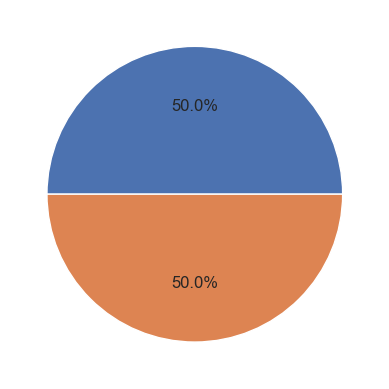

In [9]:
plt.figure()
plt.pie(df["status"].value_counts(), autopct="%0.01f%%")
plt.show()

* There are no duplicated values. 
* There are no null values.
* The dataset is balanced.

Since there are 88 columns it's not very useful to plot them all. So we have to keep only the ones that have a considerable amount of correlation with the "status" variable.

In [10]:
for column in df.columns:
    number_rows = df[column].value_counts().shape[0]
    if number_rows == 1:
        df.drop(columns=column, inplace=True)

In [11]:
cdf = df.copy()
encoder = LabelEncoder()
cdf["status"] = encoder.fit_transform(cdf["status"])
corr_matrix = cdf.corr(numeric_only=True)

In [12]:
corr_matrix.shape

(82, 82)

In [13]:
def feature_selector_corr(cmatrix, threshold):
    selected_features = {}
    feature_score = []
    for i, score in enumerate(cmatrix):
        if abs(score) >= threshold:
            selected_features[cmatrix.index[i]] = score
    return pd.DataFrame(data=[selected_features], columns=selected_features.keys())

In [14]:
features_df = feature_selector_corr(corr_matrix["status"], 0.2)
features_df.head()

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,page_rank,status
0,0.24858,0.238322,0.321698,0.207029,0.294319,0.233386,0.24227,-0.443468,0.356395,0.224335,...,0.212709,0.335393,-0.342628,-0.243982,0.207043,0.342807,-0.331889,0.731171,-0.511137,1.0


In [15]:
features_df.drop(columns="status", inplace=True)

In [16]:
X_df = cdf[features_df.columns]
X_df.head()

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,longest_words_raw,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,page_rank
0,37,19,0,3,0,0,3,1,0.000000,0.0,...,11,6,0,17,0.529412,0,0,-1,1,4
1,77,23,1,1,0,0,5,0,0.220779,0.0,...,32,32,0,30,0.966667,0,1,5767,1,2
2,126,50,1,4,1,3,5,0,0.150794,0.0,...,17,17,0,4,1.000000,0,1,4004,1,0
3,18,11,0,2,0,0,2,0,0.000000,0.0,...,5,0,0,149,0.973154,0,1,-1,0,3
4,55,15,0,2,0,0,5,1,0.000000,0.0,...,11,11,0,102,0.470588,0,0,8175,0,6


In [17]:
X_df.shape

(11430, 23)

In [18]:
y_df = cdf["status"]
y_df.shape

(11430,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

## Naive Bayes Classifier

In [20]:
scaler = MinMaxScaler()
X_strain = scaler.fit_transform(X_train)
nb = CategoricalNB()

In [21]:
nb.fit(X_strain, y_train)

CategoricalNB()

In [22]:
y_pred = nb.predict(scaler.transform(X_test))

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1157
           1       0.87      0.89      0.88      1129

    accuracy                           0.88      2286
   macro avg       0.88      0.88      0.88      2286
weighted avg       0.88      0.88      0.88      2286



print(confusion_matrix(y_test, y_pred))

In [26]:
def plot_roc(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", lw=2, label="ROC Curve (AUC = %0.2f)" % auc)
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver Operating Charasteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

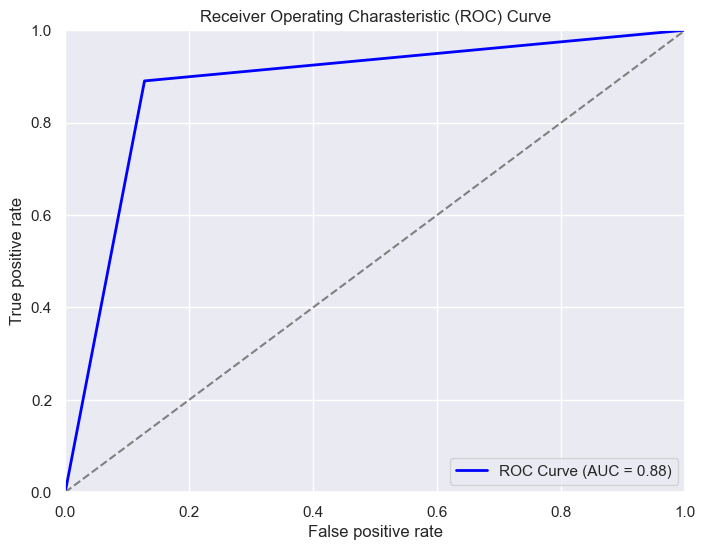

In [27]:
plot_roc(y_test, y_pred)

## Decision Tree Classifier

In [28]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_strain, y_train)
y_pred = tree.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1157
           1       0.84      0.88      0.86      1129

    accuracy                           0.86      2286
   macro avg       0.86      0.86      0.86      2286
weighted avg       0.86      0.86      0.86      2286



In [30]:
print(confusion_matrix(y_test, y_pred))

[[963 194]
 [134 995]]


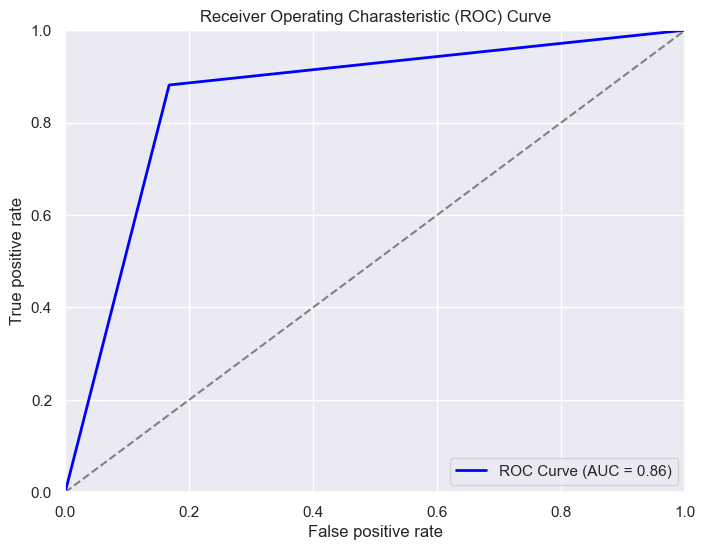

In [31]:
plot_roc(y_test, y_pred)